#Why Python?

1. Easy to use
2. Mature tools for ML and data processing
3. General-purpose language - many libraries and easy to integrate
4. Popular in the scientific community

# HowTo (learn yourself):
1. [Examples](http://scikit-learn.org/stable/auto_examples/)
2. Build-in help() ot shift-Tab
3. Google + Stack overflow

# Tools today:
1. Pandas (data manipulation)
2. Numpy (computations and data manipulation)
3. Matplotlib/pylab (visualization)

Below we have __magic cell__ (that's an official term), which enables inline plotting. --no-import-all prevents pollution of the global namespace

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

Let's check that plotting works

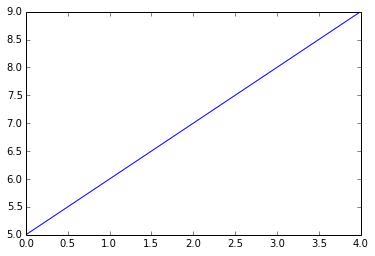

In [2]:
plt.plot(range(5), range(5, 10))

## Pandas is library for in-memory data processing, sometimes convenient for data analysis
Let's read the data you downloaded from Kaggle. Pandas can and write various formats - see [http://pandas.pydata.org/pandas-docs/stable/io.html](documentation).

In [3]:
import pandas as pd
import numpy as np
wires = pd.read_csv('data/wire_data.csv')

We'll follow [this](http://pandas.pydata.org/pandas-docs/stable/10min.html) pandas guide, feel free to consult.

Pandas has two fundamental data types: Series (1D) and DataFrame (2D).

In [4]:
series = pd.Series([1,3,5,np.nan,6,8])
print series

0     1
1     3
2     5
3   NaN
4     6
5     8
dtype: float64


In [5]:
print type(wires)

<class 'pandas.core.frame.DataFrame'>


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [6]:
df2 = pd.DataFrame({'A' : 1.,
                  'B' : pd.Timestamp('20130102'),
                  'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                  'D' : np.array([3] * 4,dtype='int32'),
                  'E' : pd.Categorical(["test","train","test","train"]),
                  'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1,2013-01-02,1,3,test,foo
1,1,2013-01-02,1,3,train,foo
2,1,2013-01-02,1,3,test,foo
3,1,2013-01-02,1,3,train,foo


The columns have different types:

In [7]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

The columns can be accesses as DataFrame attributes.

In [8]:
df2.A

0    1
1    1
2    1
3    1
Name: A, dtype: float64

##Viewing Data

In [9]:
wires.head()

,wire_id,wire_rho,wire_phi
0,0,53,0.000000
1,1,53,0.031733
2,2,53,0.063467
3,3,53,0.095200
4,4,53,0.126933


In [10]:
wires.columns

Index([u'wire_id', u'wire_rho', u'wire_phi'], dtype='object')

In [11]:
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']], dtype=object)

In [12]:
type(df2.values)

numpy.ndarray

In [13]:
wires.describe()

,wire_id,wire_rho,wire_phi
count,4482.000000,4482.000000,4482.000000
mean,2240.500000,67.637751,3.134726
std,1293.986283,8.236800,1.813998
min,0.000000,53.000000,0.000000
25%,1120.250000,61.000000,1.559778
50%,2240.500000,67.400000,3.136464
75%,3360.750000,75.400000,4.701257
max,4481.000000,80.200000,6.272927


Data can be transposed

In [14]:
wires.T

,0,1,2,3,4,5,6,7,8,9,...,4472,4473,4474,4475,4476,4477,4478,4479,4480,4481
wire_id,0,1.000000,2.000000,3.0000,4.000000,5.000000,6.0000,7.000000,8.000000,9.000000,...,4472.000000,4473.000000,4474.00000,4475.000000,4476.000000,4477.000000,4478.000000,4479.000000,4480.000000,4481.000000
wire_rho,53,53.000000,53.000000,53.0000,53.000000,53.000000,53.0000,53.000000,53.000000,53.000000,...,80.200000,80.200000,80.20000,80.200000,80.200000,80.200000,80.200000,80.200000,80.200000,80.200000
wire_phi,0,0.031733,0.063467,0.0952,0.126933,0.158666,0.1904,0.222133,0.253866,0.285599,...,6.084432,6.105376,6.12632,6.147264,6.168208,6.189152,6.210096,6.231039,6.251983,6.272927


## Selection
*Note. While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.*

Selecting a single column, which yields a Series, equivalent to df.A

In [15]:
df2['A']

0    1
1    1
2    1
3    1
Name: A, dtype: float64

Selecting via [], which slices the rows.

In [16]:
wires[100:106]

,wire_id,wire_rho,wire_phi
100,100,53,3.173326
101,101,53,3.205059
102,102,53,3.236792
103,103,53,3.268526
104,104,53,3.300259
105,105,53,3.331992


##Selection by Label

In [17]:
dates = pd.date_range('20130101', periods=6)
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,1.757879,-1.220097,1.316482,1.296807
2013-01-02,0.502591,-0.696084,-0.835591,-0.316217
2013-01-03,0.803978,-0.714175,2.287519,0.585040
2013-01-04,-1.014236,-2.004214,-0.060626,-0.142964
2013-01-05,0.678819,-1.256321,-0.006490,-0.706633
2013-01-06,-1.182917,-0.546285,-1.288410,0.502736


Note: it's inclusive

In [18]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.502591,-0.696084
2013-01-03,0.803978,-0.714175
2013-01-04,-1.014236,-2.004214


Note: .loc will reduce data dimensions and make a Series if the selection result is 1D

In [19]:
print type(df.loc['20130102',['A','B']])
print type(df.loc['20130102':'20130102',['A','B']])

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Or a scalar

In [20]:
print type(wires.loc[100, 'wire_id'])

<type 'numpy.float64'>


##Selection by Position

Select via the position of the passed integers

In [21]:
wires.iloc[34]

wire_id     34.000000
wire_rho    53.000000
wire_phi     1.078931
Name: 34, dtype: float64

By integer slices, acting similar to numpy/python

In [22]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-1.014236,-2.004214
2013-01-05,0.678819,-1.256321


By lists of integer position locations, similar to the numpy/python style

In [23]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.502591,-0.835591
2013-01-03,0.803978,2.287519
2013-01-05,0.678819,-0.006490


For slicing rows explicitly

In [24]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.502591,-0.696084,-0.835591,-0.316217
2013-01-03,0.803978,-0.714175,2.287519,0.585040


For getting a value explicitly

In [25]:
df.iloc[1,1]

-0.69608421195676817

For getting fast access to a scalar (equiv to the prior method). Note the %timeit magic.

In [26]:
%timeit df.iat[1,1]

The slowest run took 12.09 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 9.84 µs per loop


In [27]:
%timeit df.iloc[1,1]

10000 loops, best of 3: 155 µs per loop


## Boolean Indexing
Using a single column’s values to select data.

In [28]:
wires[wires.wire_id < 3]

,wire_id,wire_rho,wire_phi
0,0,53,0.000000
1,1,53,0.031733
2,2,53,0.063467


Filter the data

In [29]:
df[df > 0]

,A,B,C,D
2013-01-01,1.757879,NaN,1.316482,1.296807
2013-01-02,0.502591,NaN,NaN,NaN
2013-01-03,0.803978,NaN,2.287519,0.585040
2013-01-04,NaN,NaN,NaN,NaN
2013-01-05,0.678819,NaN,NaN,NaN
2013-01-06,NaN,NaN,NaN,0.502736


In [30]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,1.757879,-1.220097,1.316482,1.296807,one
2013-01-02,0.502591,-0.696084,-0.835591,-0.316217,one
2013-01-03,0.803978,-0.714175,2.287519,0.585040,two
2013-01-04,-1.014236,-2.004214,-0.060626,-0.142964,three
2013-01-05,0.678819,-1.256321,-0.006490,-0.706633,four
2013-01-06,-1.182917,-0.546285,-1.288410,0.502736,three


In [31]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.803978,-0.714175,2.287519,0.585040,two
2013-01-05,0.678819,-1.256321,-0.006490,-0.706633,four


##Setting
Setting a new column automatically aligns the data by the indexes

In [32]:
s1 = pd.Series(range(1, 7), index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [33]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,1.757879,-1.220097,1.316482,1.296807,NaN
2013-01-02,0.502591,-0.696084,-0.835591,-0.316217,1
2013-01-03,0.803978,-0.714175,2.287519,0.585040,2
2013-01-04,-1.014236,-2.004214,-0.060626,-0.142964,3
2013-01-05,0.678819,-1.256321,-0.006490,-0.706633,4
2013-01-06,-1.182917,-0.546285,-1.288410,0.502736,5


Setting values by label

In [34]:
df.at[dates[0],'A'] = 0

Setting values by position

In [35]:
df.iat[0,1] = 0

Setting by assigning with a numpy array

In [36]:
df.loc[:,'D'] = np.array([5] * len(df))

# Missing Data
pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the [Missing Data manual section](http://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data)

Reindexing allows you to change/add/delete the index on a specified axis. **This returns a copy of the data**.

In [37]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.316482,5,NaN,1
2013-01-02,0.502591,-0.696084,-0.835591,5,1,1
2013-01-03,0.803978,-0.714175,2.287519,5,2,NaN
2013-01-04,-1.014236,-2.004214,-0.060626,5,3,NaN


In [38]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.316482,5,NaN
2013-01-02,0.502591,-0.696084,-0.835591,5,1
2013-01-03,0.803978,-0.714175,2.287519,5,2
2013-01-04,-1.014236,-2.004214,-0.060626,5,3
2013-01-05,0.678819,-1.256321,-0.006490,5,4
2013-01-06,-1.182917,-0.546285,-1.288410,5,5


To drop any rows that have missing data. Note: this **won't modify the DataFrame**.

In [39]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.502591,-0.696084,-0.835591,5,1,1


In [40]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.316482,5,NaN,1
2013-01-02,0.502591,-0.696084,-0.835591,5,1,1
2013-01-03,0.803978,-0.714175,2.287519,5,2,NaN
2013-01-04,-1.014236,-2.004214,-0.060626,5,3,NaN


Filling missing data

In [41]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.316482,5,5,1
2013-01-02,0.502591,-0.696084,-0.835591,5,1,1
2013-01-03,0.803978,-0.714175,2.287519,5,2,5
2013-01-04,-1.014236,-2.004214,-0.060626,5,3,5


To get the boolean mask where values are nan

In [42]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


##Grouping
By "group by" we are referring to a process involving one or more of the following steps:
 1. Splitting the data into groups based on some criteria
 2. Applying a function to each group independently
 3. Combining the results into a data structure
 
See the [Grouping](http://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby) manual section

In [43]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.258094,-0.423753
1,bar,one,-0.964402,0.454532
2,foo,two,2.474590,0.131974
3,bar,three,-1.573603,1.415610
4,foo,two,-1.406510,1.675175
5,bar,two,-1.396168,-0.344772
6,foo,one,0.966912,-2.183117
7,foo,three,-1.405614,-0.266918


Grouping and then applying a function sum to the resulting groups.

In [44]:
df.groupby('A').sum()

,C,D
A,,
bar,-3.934172,1.525369
foo,0.887473,-1.066639


Grouping by multiple columns forms a hierarchical index, which we then apply the function.

In [45]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.964402  0.454532
    three -1.573603  1.415610
    two   -1.396168 -0.344772
foo one    1.225007 -2.606870
    three -1.405614 -0.266918
    two    1.068080  1.807149

Any function of your choosing

In [46]:
df.groupby(['A']).apply(lambda x: x.shape)

A
bar    (3, 4)
foo    (5, 4)
dtype: object

## Categoricals
pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](http://pandas.pydata.org/pandas-docs/stable/categorical.html#categorical) and the [API documentation](http://pandas.pydata.org/pandas-docs/stable/api.html#api-categorical).

In [47]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df["grade"] = df["raw_grade"].astype("category")
df.dtypes

id              int64
raw_grade      object
grade        category
dtype: object

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [48]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [49]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df.grade

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [50]:
df.sort("grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [51]:
df.groupby("grade").size()

grade
very bad      1
bad         NaN
medium      NaN
good          2
very good     3
dtype: float64

## Pandas: takeawy
If you know it, Pandas can lead to readable, elegant, maybe even fast code. Pitfalls:
1. Copy vs. view
2. In-place vs. copy vs. view
3. Indexing - know what you are doing


See also http://pandas.pydata.org/pandas-docs/stable/gotchas.html#gotchas

# Numpy
A library for matrix computation. http://wiki.scipy.org/Tentative_NumPy_Tutorial

NumPy's main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of positive integers. In Numpy dimensions are called axes. The number of axes is rank.

For example, the coordinates of a point in 3D space [1, 2, 1] is an array of rank 1, because it has one axis. That axis has a length of 3. In example pictured below, the array has rank 2 (it is 2-dimensional). The first dimension (axis) has a length of 2, the second dimension has a length of 3. 

In [52]:
np.array([[1, 0, 3], [0, 1, 2]])

array([[1, 0, 3],
       [0, 1, 2]])

Numpy's array class is called ndarray. It is also known by the alias array. Note that numpy.array is not the same as the Standard Python Library class array.array, which only handles one-dimensional arrays and offers less functionality. The more important attributes of an ndarray object are:

ndarray.ndim
 * the number of axes (dimensions) of the array. In the Python world, the number of dimensions is referred to as rank. 
    
ndarray.shape
 * the dimensions of the array. This is a tuple of integers indicating the size of the array in each dimension. For a matrix with n rows and m columns, shape will be (n,m). The length of the shape tuple is therefore the rank, or number of dimensions, ndim. 

ndarray.size
  * the total number of elements of the array. This is equal to the product of the elements of shape. 

ndarray.dtype
 * an object describing the type of the elements in the array. One can create or specify dtype's using standard Python types. Additionally NumPy provides types of its own. numpy.int32, numpy.int16, and numpy.float64 are some examples. 
 
ndarray.itemsize
 * the size in bytes of each element of the array. For example, an array of elements of type float64 has itemsize 8 (=64/8), while one of type complex32 has itemsize 4 (=32/8). It is equivalent to ndarray.dtype.itemsize. 

ndarray.data
 * the buffer containing the actual elements of the array. Normally, we won't need to use this attribute because we will access the elements in an array using indexing facilities. 

## Array Creation

There are several ways to create arrays.

For example, you can create an array from a regular Python list or tuple using the array function. The type of the resulting array is deduced from the type of the elements in the sequences. 

In [53]:
a = np.array((1, 2, 53))
a

array([ 1,  2, 53])

In [54]:
a.dtype

dtype('int64')

In [55]:
np.array([0.43, 03.4]).dtype

dtype('float64')

array transforms sequences of sequences into two-dimensional arrays, sequences of sequences of sequences into three-dimensional arrays, and so on.

In [56]:
np.array([(1.5, 2, 3), (4, 5, 6)])

array([[ 1.5,  2. ,  3. ],
       [ 4. ,  5. ,  6. ]])

The type of the array can also be explicitly specified at creation time. Also note handling of complex.

In [57]:
np.array([[1, 2], [3, 4]], dtype=complex)

array([[ 1.+0.j,  2.+0.j],
       [ 3.+0.j,  4.+0.j]])

Often, the elements of an array are originally unknown, but its size is known. Hence, NumPy offers several functions to create arrays with initial placeholder content. These minimize the necessity of growing arrays, an expensive operation.

The function zeros creates an array full of zeros, the function ones creates an array full of ones, and the function empty creates an array whose initial content is random and depends on the state of the memory. By default, the dtype of the created array is float64. 

In [58]:
print np.ones(3)
print np.zeros(2)
print np.empty([2, 2])

[ 1.  1.  1.]
[ 0.  0.]
[[ 0.  0.]
 [ 0.  0.]]


To create sequences of numbers, NumPy provides a function analogous to range that returns arrays instead of lists 

In [59]:
print(np.linspace(0, 1, num=4))
print(np.arange(0, 1, step=0.3))

[ 0.          0.33333333  0.66666667  1.        ]
[ 0.   0.3  0.6  0.9]


##Basic Operations
Arithmetic operators on arrays apply elementwise. A new array is created and filled with the result. Some operations, such as += and *=, act in place to modify an existing array rather than create a new one.

In [60]:
a = np.array([20, 30, 40, 50])
b = np.arange(4)
print(a, b)
print(a-b)
print(b**2)
print(a > 32)
a += 1
print(a)

(array([20, 30, 40, 50]), array([0, 1, 2, 3]))
[20 29 38 47]
[0 1 4 9]
[False False  True  True]
[21 31 41 51]


Unlike in many matrix languages, the product operator * operates elementwise in NumPy arrays. The matrix product can be performed using the dot function or creating matrix objects. 

In [61]:
A = np.array([[1,1], [0,1]])
B = np.array([[2,0], [3,4]])
print (A * B)
print np.dot(A, B)

[[2 0]
 [0 4]]
[[5 4]
 [3 4]]


When operating with arrays of different types, the type of the resulting array corresponds to the more general or precise one (a behavior known as upcasting). 

In [62]:
a = np.ones(3, dtype=np.int)
b = np.linspace(0, np.pi, 3)
print(a.dtype, b.dtype, (a + b).dtype)

(dtype('int64'), dtype('float64'), dtype('float64'))


Many unary operations, such as computing the sum of all the elements in the array, are implemented as methods of the ndarray class.

In [63]:
a = np.random.random((2,3))
print a
print(a.sum(), a.min(), a.max())

[[ 0.2713103   0.47129516  0.09664044]
 [ 0.01246714  0.40277193  0.72661788]]
(1.9811028414160403, 0.012467141631195333, 0.72661787648108456)


By default, these operations apply to the array as though it were a list of numbers, regardless of its shape. However, by specifying the axis parameter you can apply an operation along the specified axis of an array: 

In [64]:
b = np.arange(12).reshape(3,4)
print(b)
print(b.sum(axis=0))
print(b.sum(axis=1))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[12 15 18 21]
[ 6 22 38]


##Universal Functions

NumPy provides familiar mathematical functions such as sin, cos, and exp. In NumPy, these are called "universal functions" (ufunc). Within NumPy, these functions operate elementwise on an array, producing an array as output. 

In [65]:
np.sqrt(np.arange(0, 10))

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
        2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ])

##Indexing, Slicing and Iterating

One-dimensional arrays can be indexed, sliced and iterated over, much like lists and other Python sequences. Format [start:stop:step]

In [66]:
a = np.arange(10)**2
print(a)

[ 0  1  4  9 16 25 36 49 64 81]


In [67]:
a[2]

4

In [68]:
a[3:100]

array([ 9, 16, 25, 36, 49, 64, 81])

In [69]:
a[::-1]

array([81, 64, 49, 36, 25, 16,  9,  4,  1,  0])

In [70]:
a[::2]

array([ 0,  4, 16, 36, 64])

Multidimensional arrays can have one index per axis. These indices are given in a tuple separated by commas: 

In [71]:
def f(x,y):
    return 10*x+y
b = np.fromfunction(f, (5, 4), dtype=int)
print(b)

[[ 0  1  2  3]
 [10 11 12 13]
 [20 21 22 23]
 [30 31 32 33]
 [40 41 42 43]]


In [72]:
b[2,3]

23

Each row in the second column of b

In [73]:
b[0:5, 1]                       

array([ 1, 11, 21, 31, 41])

Euivalent to the previous example

In [74]:
b[ : ,1]

array([ 1, 11, 21, 31, 41])

Each column in the second and third row of b

In [75]:
b[1:3, : ]                      

array([[10, 11, 12, 13],
       [20, 21, 22, 23]])

When fewer indices are provided than the number of axes, the missing indices are considered complete slices. The expression within brackets in b[i] is treated as an i followed by as many instances of : as needed to represent the remaining axes. NumPy also allows you to write this using dots as b[i,...].

The dots (...) represent as many colons as needed to produce a complete indexing tuple. For example, if x is a rank 5 array (i.e., it has 5 axes), then

    x[1,2,...] is equivalent to x[1,2,:,:,:],

    x[...,3] to x[:,:,:,:,3] and

    x[4,...,5,:] to x[4,:,:,5,:]. 

In [76]:
b[-1]

array([40, 41, 42, 43])

Iterating over multidimensional arrays is done with respect to the first axis:

In [77]:
for row in b:
    print row

[0 1 2 3]
[10 11 12 13]
[20 21 22 23]
[30 31 32 33]
[40 41 42 43]


However, if one wants to perform an operation on each element in the array, one can use the flat attribute which is an iterator over all the elements of the array:

In [78]:
for element in b.flat:
    print element

0
1
2
3
10
11
12
13
20
21
22
23
30
31
32
33
40
41
42
43


## Shape Manipulation
Changing the shape of an array. An array has a shape given by the number of elements along each axis: 

In [79]:
a = np.floor(10*np.random.random((3,4)))
print(a, a.shape)

(array([[ 3.,  1.,  3.,  3.],
       [ 8.,  6.,  3.,  3.],
       [ 2.,  3.,  8.,  1.]]), (3, 4))


The shape of an array can be changed with various commands: 

In [80]:
print(a.ravel())
print(a.transpose())

[ 3.  1.  3.  3.  8.  6.  3.  3.  2.  3.  8.  1.]
[[ 3.  8.  2.]
 [ 1.  6.  3.]
 [ 3.  3.  8.]
 [ 3.  3.  1.]]


The order of the elements in the array resulting from ravel() is normally "C-style", that is, the rightmost index "changes the fastest", so the element after a[0,0] is a[0,1]. If the array is reshaped to some other shape, again the array is treated as "C-style". Numpy normally creates arrays stored in this order, so ravel() will usually not need to copy its argument, but if the array was made by taking slices of another array or created with unusual options, it may need to be copied. The functions ravel() and reshape() can also be instructed, using an optional argument, to use FORTRAN-style arrays, in which the leftmost index changes the fastest.

The reshape function returns its argument with a modified shape, whereas the resize method modifies the array itself: 

In [81]:
print(a)
a.resize((2, 6))
print(a)

[[ 3.  1.  3.  3.]
 [ 8.  6.  3.  3.]
 [ 2.  3.  8.  1.]]
[[ 3.  1.  3.  3.  8.  6.]
 [ 3.  3.  2.  3.  8.  1.]]


If a dimension is given as -1 in a reshaping operation, the other dimensions are automatically calculated: 

In [82]:
a.reshape(3,-1)

array([[ 3.,  1.,  3.,  3.],
       [ 8.,  6.,  3.,  3.],
       [ 2.,  3.,  8.,  1.]])

## Stacking together different arrays

Several arrays can be stacked together along different axes: 

In [83]:
a = np.floor(10*np.random.random((2,2)))
b = np.floor(10*np.random.random((2,2)))
print(a)
print(b)

[[ 9.  8.]
 [ 2.  2.]]
[[ 6.  2.]
 [ 3.  9.]]


In [84]:
np.vstack((a, b))

array([[ 9.,  8.],
       [ 2.,  2.],
       [ 6.,  2.],
       [ 3.,  9.]])

In [85]:
np.hstack((a, b))

array([[ 9.,  8.,  6.,  2.],
       [ 2.,  2.,  3.,  9.]])

The function column_stack stacks 1D arrays as columns into a 2D array. It is equivalent to vstack only for 1D arrays: 

In [86]:
np.column_stack((a,b))  

array([[ 9.,  8.,  6.,  2.],
       [ 2.,  2.,  3.,  9.]])

In [87]:
b = np.array([2., 8.])
np.column_stack((a, b))

array([[ 9.,  8.,  2.],
       [ 2.,  2.,  8.]])

The function row_stack, on the other hand, stacks 1D arrays as rows into a 2D array.

For arrays of with more than two dimensions, hstack stacks along their second axes, vstack stacks along their first axes, and concatenate allows for an optional arguments giving the number of the axis along which the concatenation should happen.
## Splitting one array into several smaller ones

In [88]:
a = np.floor(10*np.random.random((2,12)))
a

array([[ 1.,  3.,  6.,  3.,  5.,  6.,  1.,  4.,  8.,  0.,  2.,  1.],
       [ 0.,  9.,  7.,  3.,  0.,  7.,  8.,  0.,  6.,  6.,  5.,  6.]])

Split a into 3

In [89]:
np.hsplit(a, 3)

[array([[ 1.,  3.,  6.,  3.],
        [ 0.,  9.,  7.,  3.]]), array([[ 5.,  6.,  1.,  4.],
        [ 0.,  7.,  8.,  0.]]), array([[ 8.,  0.,  2.,  1.],
        [ 6.,  6.,  5.,  6.]])]

Split a after the third and the fourth column

In [90]:
np.hsplit(a, (3, 4))

[array([[ 1.,  3.,  6.],
        [ 0.,  9.,  7.]]), array([[ 3.],
        [ 3.]]), array([[ 5.,  6.,  1.,  4.,  8.,  0.,  2.,  1.],
        [ 0.,  7.,  8.,  0.,  6.,  6.,  5.,  6.]])]

## Copies and Views or how to shoot yourself in the foot

When operating and manipulating arrays, their data is sometimes copied into a new array and sometimes not. This is often a source of confusion for beginners. There are three cases:
### No Copy at All

In [91]:
a = np.arange(12)
b = a
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [92]:
b[0] = -100
b

array([-100,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11])

In [93]:
a

array([-100,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11])

### View or Shallow Copy

Different array objects can share the same data. The view method creates a new array object that looks at the same data. 

In [94]:
c = a.view()

In [95]:
c.resize((2, 6))
c

array([[-100,    1,    2,    3,    4,    5],
       [   6,    7,    8,    9,   10,   11]])

In [96]:
a

array([-100,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11])

In [97]:
a[0] = 123

In [98]:
c

array([[123,   1,   2,   3,   4,   5],
       [  6,   7,   8,   9,  10,  11]])

Slicing an array returns a view of it.

In [99]:
s = c[ : , 1:3]  

In [100]:
s[:] = 10

In [101]:
c

array([[123,  10,  10,   3,   4,   5],
       [  6,  10,  10,   9,  10,  11]])

### Deep Copy

The copy method makes a complete copy of the array and its data. 

In [102]:
d = a.copy()        

In [103]:
d[0] = -42
d

array([-42,  10,  10,   3,   4,   5,   6,  10,  10,   9,  10,  11])

In [104]:
a

array([123,  10,  10,   3,   4,   5,   6,  10,  10,   9,  10,  11])

## Broadcasting rules (know what you are doing)

Broadcasting allows universal functions to deal in a meaningful way with inputs that do not have exactly the same shape.

The first rule of broadcasting is that if all input arrays do not have the same number of dimensions, a "1" will be repeatedly prepended to the shapes of the smaller arrays until all the arrays have the same number of dimensions.

The second rule of broadcasting ensures that arrays with a size of 1 along a particular dimension act as if they had the size of the array with the largest shape along that dimension. The value of the array element is assumed to be the same along that dimension for the "broadcast" array.

After application of the broadcasting rules, the sizes of all arrays must match. More details can be found in this documentation. 

## Fancy indexing and index tricks

NumPy offers more indexing facilities than regular Python sequences. In addition to indexing by integers and slices, as we saw before, arrays can be indexed by arrays of integers and arrays of booleans. Remember Pandas?

### Indexing with Arrays of Indices

In [105]:
a = np.arange(12)**2         
i = np.array([ 1,1,3,8,5 ])
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [106]:
a[i]

array([ 1,  1,  9, 64, 25])

A bidimensional array of indices

In [107]:
j = np.array([[ 3, 4], [9, 7]])

Note the same shape

In [108]:
a[j]

array([[ 9, 16],
       [81, 49]])

Also can have multidimensional both index and array - see [documentation](http://wiki.scipy.org/Tentative_NumPy_Tutorial#head-3f4d28139e045a442f78c5218c379af64c2c8c9e)
## Indexing with Boolean Arrays
When we index arrays with arrays of (integer) indices we are providing the list of indices to pick. With boolean indices the approach is different; we explicitly choose which items in the array we want and which ones we don't.

The most natural way one can think of for boolean indexing is to use boolean arrays that have the same shape as the original array:

In [109]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [110]:
b = a > 4
b

array([[False, False, False, False],
       [False,  True,  True,  True],
       [ True,  True,  True,  True]], dtype=bool)

In [111]:
a[b]

array([ 5,  6,  7,  8,  9, 10, 11])

The second way of indexing with booleans is more similar to integer indexing; for each dimension of the array we give a 1D boolean array selecting the slices we want. Note that the length of the 1D boolean array must coincide with the length of the dimension (or axis) you want to slice. In the following example, b1 is a 1-rank array with length 3 (the number of rows in a), and b2 (of length 4) is suitable to index the 2nd rank (columns) of a. 

In [112]:
a = np.arange(12).reshape(3,4)
b1 = np.array([False,True,True])             # first dim selection
b2 = np.array([True,False,True,False])       # second dim selection

In [113]:
a[b1, :] # rows

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [114]:
a[:, b2] # columns

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [115]:
a[b1, b2] # both, 

array([ 4, 10])

# Exercises
due to Petr Romov

SELF. Generate a matrix with 1000 rows and 50 columns, elements being drawn from normal distribution. Specify random seed to make the result reproducible. $\mathcal{N}(1, 10)$. Use http://docs.scipy.org/doc/numpy/reference/routines.random.html

In [ ]:
# Your code goes here
# x = ...
print x[:10, :10]

SELF. Normalize the matrix: subtract from each column its mean and divide by the standard deviation. I suggest np.mean, np.std with axis parameter.

In [117]:
# Your code goes here

Print for the following matrix row numbers for those rows, where element sum is greater than 10. I suggest np.sum and np.nonzero

In [118]:
Z = np.array([[4, 5, 0],
              [1, 9, 3],
              [5, 1, 1],
              [3, 3, 3],
              [9, 9, 9],
              [4, 7, 1]])

In [2]:
# Your code goes here

# Plotting
Let's plot the wires structure.

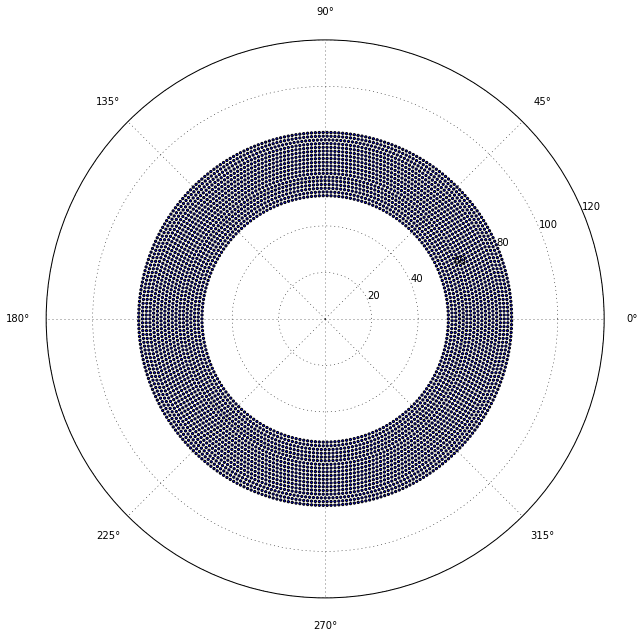

In [120]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, polar=True)
ax.scatter(wires['wire_phi'], wires['wire_rho'], marker='.')

An interesting question. Is the wire position in degrees or radians?

In [121]:
wires['wire_phi'].max()

6.2729273561599994

Radians it is.

Let's write a routine for finding the closest neighbours of a wire.

In [122]:
import numpy as np
wires_cartesian = np.vstack((wires['wire_rho'] * np.cos(wires['wire_phi']),
                                  wires['wire_rho'] * np.sin(wires['wire_phi']))).T
from sklearn.neighbors import KDTree
neighbors_tree = KDTree(wires_cartesian)

Let's plot the neighbours for some random wires.

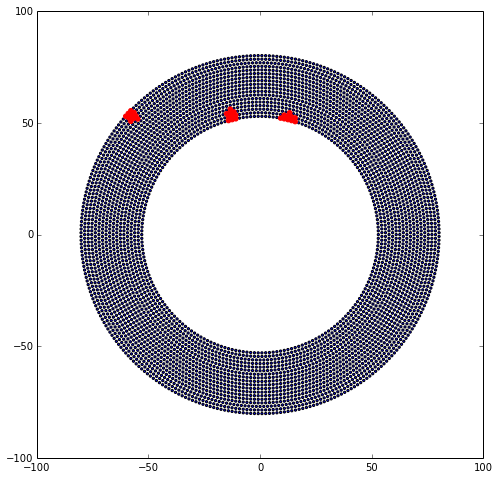

In [123]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(wires_cartesian[:, 0], wires_cartesian[:, 1], marker='.')
def plot_neighbours(wire_id):
    distances, indexes = neighbors_tree.query(wires_cartesian[wire_id], k=10)
    return ax.scatter(wires_cartesian[indexes][:, :, 0], wires_cartesian[indexes][:, :, 1], color='r')
map(plot_neighbours, (42, 256, 4000))

Now let's plot some events.

In [124]:
events = pd.read_csv("data/train.csv")

In [125]:
events.head()

,global_id,event_id,wire_id,energy_deposit,relative_time,label
0,0,0,0,0.000000e+00,0.000000,0
1,1,0,1,0.000000e+00,0.000000,0
2,2,0,2,0.000000e+00,0.000000,0
3,3,0,3,0.000000e+00,0.000000,0
4,4,0,4,1.178108e-08,22.224176,2


Let's select an event.

In [126]:
the_event = events[events.event_id==54]
the_event.head()

,global_id,event_id,wire_id,energy_deposit,relative_time,label
242028,242028,54,0,0.000109,334.241453,2
242029,242029,54,1,0.000000,0.000000,0
242030,242030,54,2,0.000000,0.000000,0
242031,242031,54,3,0.000000,0.000000,0
242032,242032,54,4,0.000000,0.000000,0


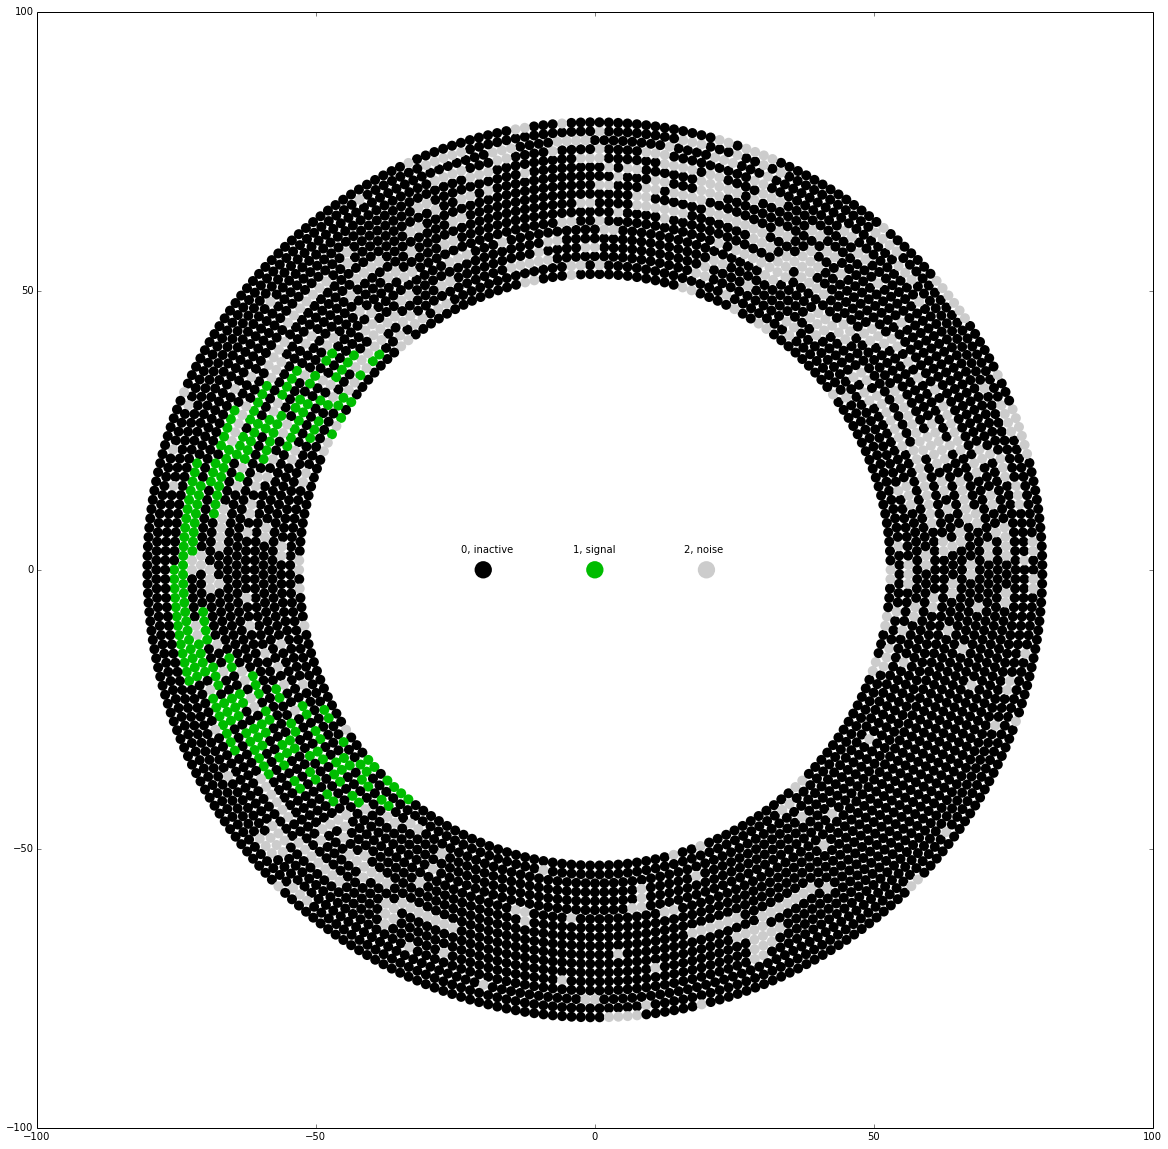

In [127]:
fig, ax = plt.subplots(figsize=(20,20))
colormap = 'spectral'
ax.scatter(wires_cartesian[:, 0], wires_cartesian[:, 1], c=the_event.label, edgecolors='none',
           s=100, cmap=colormap)
# We want to know what color corresponds to which label
labels_x = (-20, 0, 20)
ax.scatter(labels_x, (0, 0, 0), c=(0, 1, 2), cmap=colormap, edgecolors='none', s=300)
for label, coordinate in zip(("0, inactive", "1, signal", "2, noise"), labels_x):
    ax.annotate(label, xy=(coordinate-4, 3))

Alternatively, we can plot the energy

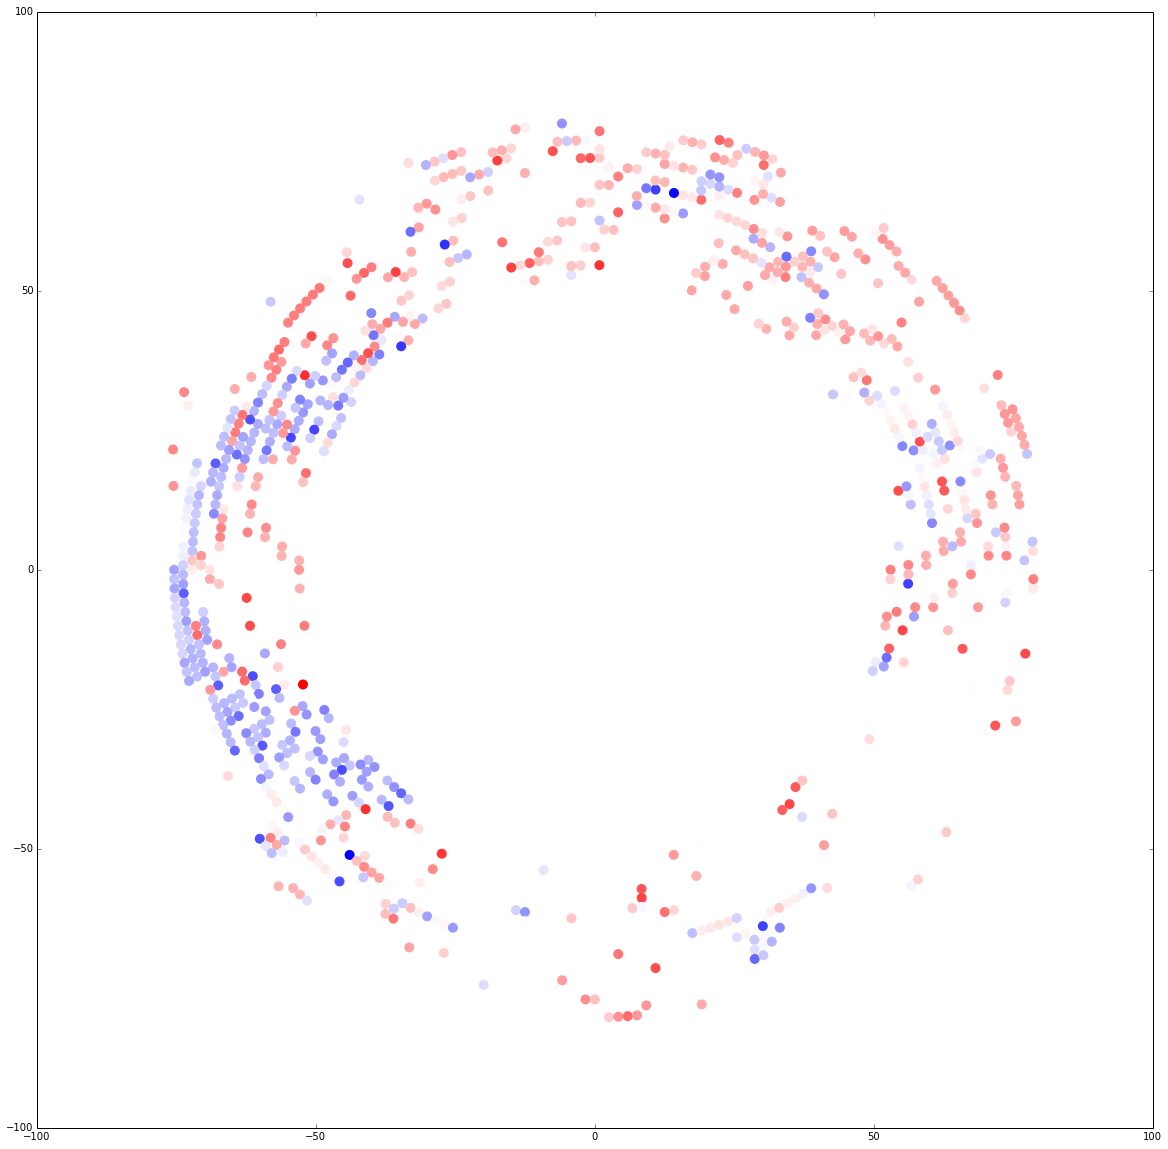

In [128]:
fig, ax = plt.subplots(figsize=(20,20))
ax.scatter(wires_cartesian[:, 0], wires_cartesian[:, 1], c=np.log(the_event.energy_deposit), edgecolors='none',
           s=100, cmap='bwr')

Plot time evolution of an event.

In [129]:
max_time = the_event.relative_time.max()
frames_number = 6
columns_number = 2
rows_number = np.ceil(frames_number / float(columns_number))

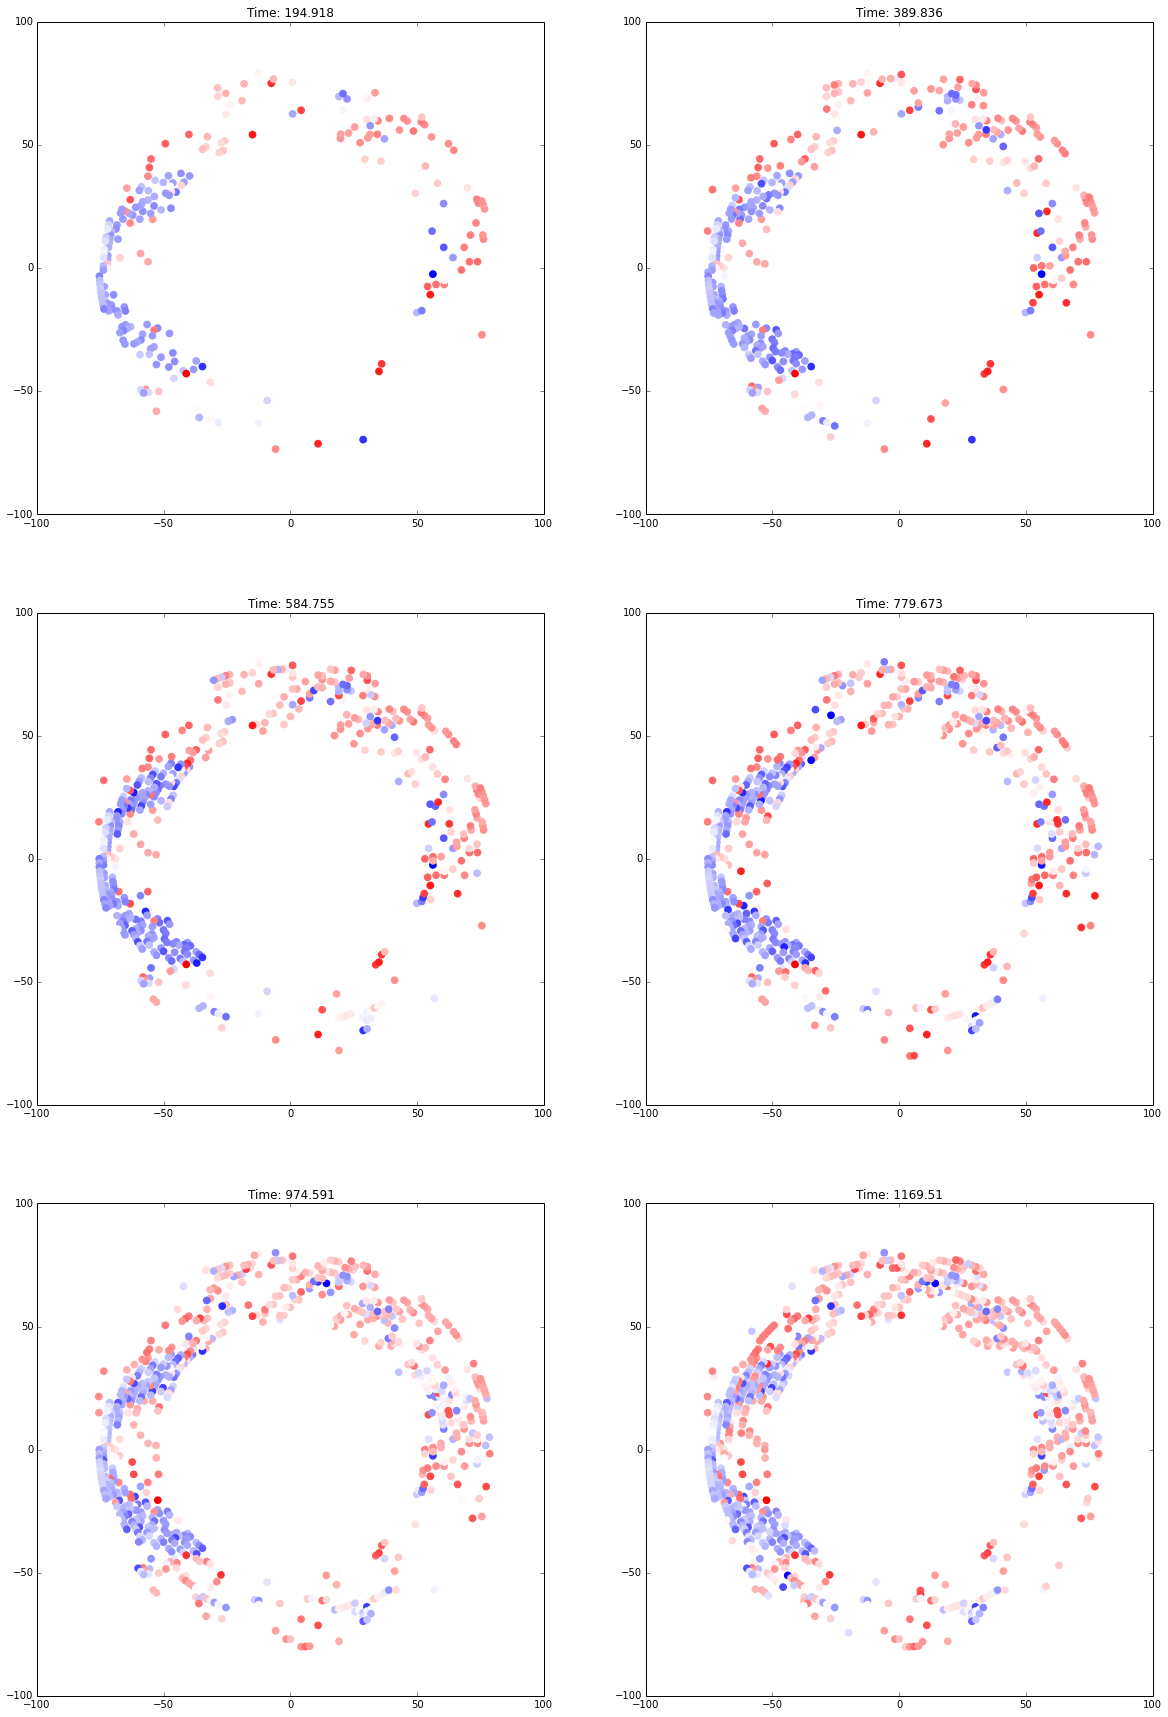

In [130]:
fig = plt.figure(figsize=(10*columns_number, 10*rows_number, ))
for frame in xrange(frames_number):
    time = max_time * (frame + 1) / float(frames_number)
    active_wires = the_event.relative_time <= time + 1
    ax = fig.add_subplot(rows_number, columns_number, frame + 1)
    ax.scatter(wires_cartesian[np.array(active_wires), 0], wires_cartesian[np.array(active_wires), 1],
               c=np.log(np.array(the_event[np.array(active_wires)].energy_deposit)), edgecolors='none',
               s=60, cmap='bwr')
    ax.set_title("Time: %g" % time)

A histogram

In [134]:
events.head()

,global_id,event_id,wire_id,energy_deposit,relative_time,label
0,0,0,0,0.000000e+00,0.000000,0
1,1,0,1,0.000000e+00,0.000000,0
2,2,0,2,0.000000e+00,0.000000,0
3,3,0,3,0.000000e+00,0.000000,0
4,4,0,4,1.178108e-08,22.224176,2


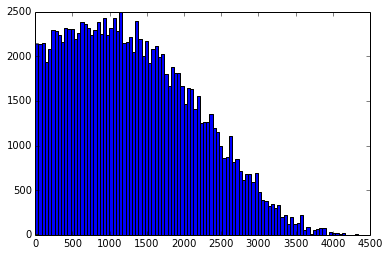

In [135]:
fig, ax = plt.subplots()
_ = ax.hist(events.loc[(events.label == 1)].wire_id.values, bins=100)

Let's plot histograms for energy_deposit for various labels. Bonus if you make y logscale. SELF.

In [3]:
# Your code goes here

Now let's plot the distribution of total energy deposit as a function of number of signal wires. SELF

In [4]:
# Your code goes here
# energy_deposit_sum = 
# signal_wires_sum = 

In [5]:
# Your code goes here

Nothing useful. Get used to it you'll be getting negative results a lot - more on feature engineering tomorrow.

Plot time evolution for labels - i. e. what wires were activated before given time. SELF

In [6]:
# Your code goes here

Test events for radial symmetry - i. e. whether energy_deposit and label are correlated with the angle. SELF

In [7]:
# Your code goes here

In [8]:
# Your code goes here

In [9]:
# Your code goes here

Write a procedure to "rotate" an event in terms of wire ids - i. e. how would an event look in detector if it was 
by some angle. PLot an example. SELF

In [10]:
# Your code goes here

Bonus. Fix following code. SELF

In [152]:
# Select wires with a condition
signal_wires = the_event.label == 0
print signal_wires.shape
print signal_wires.sum()
print signal_wires.dtype
# So we have a boolean mask with 3639 positive values
print wires_cartesian[signal_wires, :].shape
# But it selects all the rows, we want only 3639

(4482,)
3639
bool
(4482, 2)


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:7: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


KeyError: 0

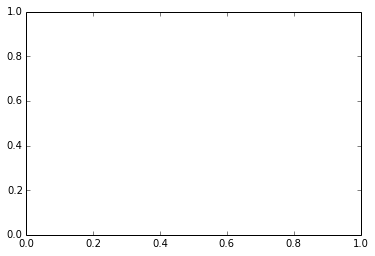

In [154]:
# Want a histogram of relative_time
fig, ax = plt.subplots()
ax.hist(the_event[the_event.relative_time > 100].relative_time)

SELF. Bonus. Test hypothesis: "if no in k closest wires of a wire are signal then the wire is not signal" for different k.

SELF. Bonus. Use numpy to implement fitting of a regularazed polynomial
http://openclassroom.stanford.edu/MainFolder/DocumentPage.php?course=MachineLearning&doc=exercises/ex5/ex5.html